In [3]:
import pandas as pd
import plotly.express as px

In [195]:
df=pd.read_csv('D:/jupyter/Kumar DS Projects/KP1-Analysis and Visualization of Global Population Data/Kumar World-population-by-countries-dataset.csv')

In [197]:
df

,Country Name,2018,2019,2020,2021
0,Afghanistan,"37,017,000","37,641,000","38,928,000","39,868,000"
1,Albania,"2,869,000","2,887,000","2,827,000","2,827,000"
2,Algeria,"41,698,000","42,208,000","43,024,000","43,851,000"
3,Andorra,"77,006","77,065","77,092","77,250"
4,Angola,"30,809,000","31,840,000","32,779,000","33,758,000"
...,...,...,...,...,...
191,Venezuela,"37,790,000","37,879,000","37,835,000","37,683,000"
192,Vietnam,"102,879,000","104,181,000","105,507,000","106,837,000"
193,Yemen,"31,177,000","31,518,000","31,859,000","32,204,000"
194,Zambia,"21,060,000","21,479,000","21,870,000","22,242,000"


In [213]:
data=df[['Country Name','2021']]
data

,Country Name,2021
0,Afghanistan,"39,868,000"
1,Albania,"2,827,000"
2,Algeria,"43,851,000"
3,Andorra,"77,250"
4,Angola,"33,758,000"
...,...,...
191,Venezuela,"37,683,000"
192,Vietnam,"106,837,000"
193,Yemen,"32,204,000"
194,Zambia,"22,242,000"


In [215]:
data.rename(columns={'2021': 'population'},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8656\1505147946.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [219]:
data

,Country Name,population
0,Afghanistan,"39,868,000"
1,Albania,"2,827,000"
2,Algeria,"43,851,000"
3,Andorra,"77,250"
4,Angola,"33,758,000"
...,...,...
191,Venezuela,"37,683,000"
192,Vietnam,"106,837,000"
193,Yemen,"32,204,000"
194,Zambia,"22,242,000"


In [221]:
data.info() #consise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  196 non-null    object
 1   population    196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [223]:
data.isnull().sum() #identify and count the number of missing(null) values in my dataset

Country Name    0
population      0
dtype: int64

In [227]:
data

,Country Name,population
0,Afghanistan,"39,868,000"
1,Albania,"2,827,000"
2,Algeria,"43,851,000"
3,Andorra,"77,250"
4,Angola,"33,758,000"
...,...,...
191,Venezuela,"37,683,000"
192,Vietnam,"106,837,000"
193,Yemen,"32,204,000"
194,Zambia,"22,242,000"


In [229]:
data.dtypes

Country Name    object
population      object
dtype: object

In [231]:
#As the dtype of population column is object, it has to be converted to int
data['population'] = data['population'].str.replace(',', '').astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8656\3339405452.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [233]:
data

,Country Name,population
0,Afghanistan,39868000
1,Albania,2827000
2,Algeria,43851000
3,Andorra,77250
4,Angola,33758000
...,...,...
191,Venezuela,37683000
192,Vietnam,106837000
193,Yemen,32204000
194,Zambia,22242000


In [235]:
data.dtypes

Country Name    object
population       int32
dtype: object

In [29]:
#Basic Statistics

In [237]:
#1.Total Population
total_population=data['population'].sum()
total_population

8007320104

In [239]:
#2.Avg population
avg_population=data['population'].mean()
avg_population

40853674.0

In [241]:
#no of countries
total_countries = data['Country Name'].nunique()
total_countries

196

In [243]:
fig = px.histogram(data, x='population', title='Population Distribution', labels={'population': 'Population'})

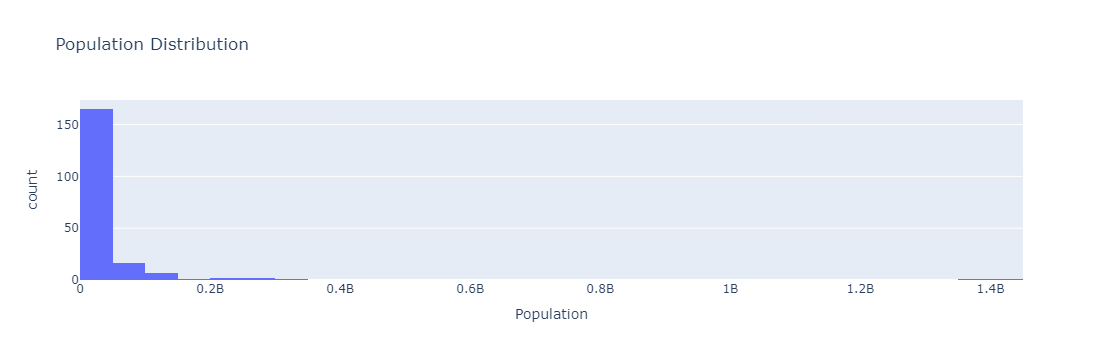

In [245]:
fig.show() #it shows the no of countries(count) and their range of population

In [247]:
#top_10_countries = data.sort_values(by='population', ascending=False).head(10)
top_10_contries = data.nlargest(10, 'population')
top_10_contries

,Country Name,population
35,China,1421775000
76,India,1392605000
186,United States,348503000
77,Indonesia,274925000
132,Pakistan,253497000
128,Nigeria,230928000
23,Brazil,215812000
13,Bangladesh,168171000
143,Russia,143539000
112,Mexico,127795000


In [249]:
least_10_countries = data.nsmallest(10,'population')
least_10_countries

,Country Name,population
190,Vatican City,803
122,Nauru,10956
181,Tuvalu,13032
133,Palau,21535
149,San Marino,36028
100,Liechtenstein,38869
115,Monaco,39694
145,Saint Kitts and Nevis,57192
109,Marshall Islands,59974
48,Dominica,71666


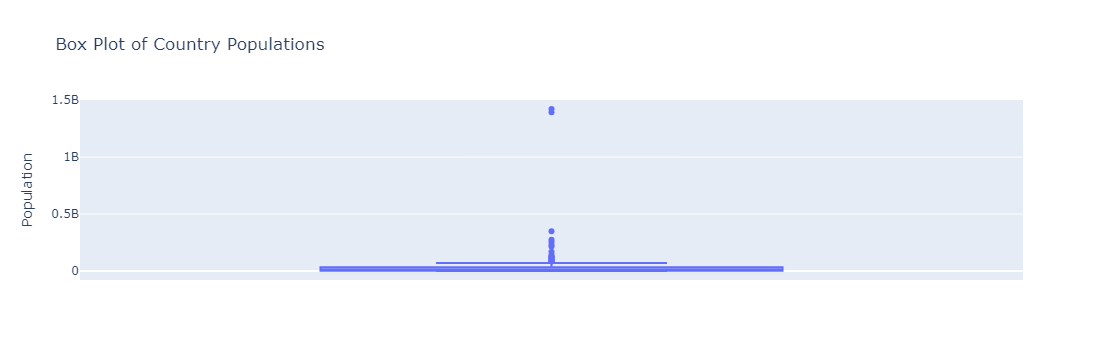

In [251]:
fig_box = px.box(data, y='population',
                 title='Box Plot of Country Populations',
                 labels={'population': 'Population'})
fig_box.show()

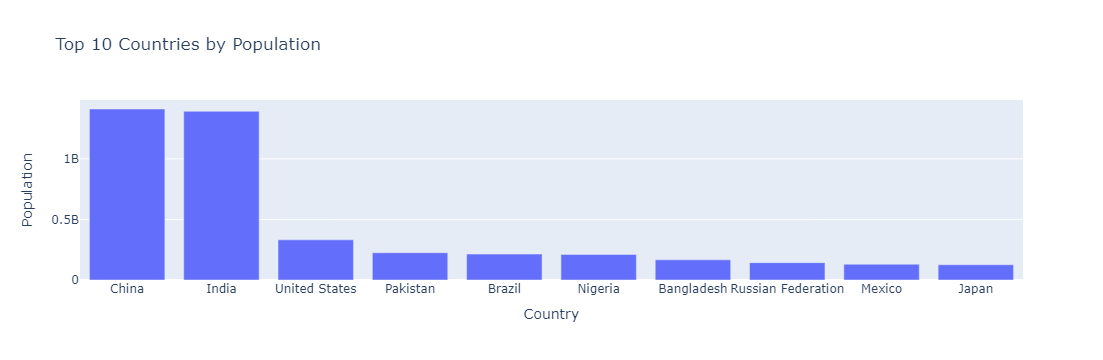

In [253]:
fig = px.bar(top_10_countries, x='Country Name', y='population', title='Top 10 Countries by Population', labels={'population': 'Population', 'Country Name': 'Country'})
fig.show()

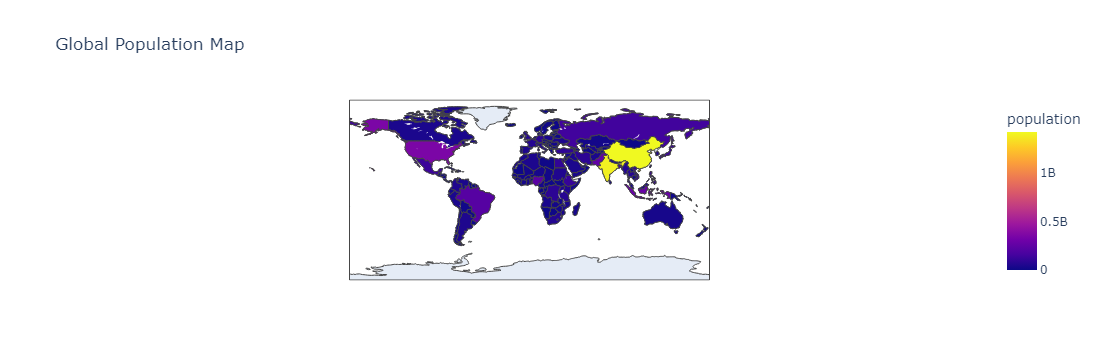

In [261]:
fig_map = px.choropleth(data, locations="Country Name", locationmode='country names', color='population', hover_name="Country Name", color_continuous_scale=px.colors.sequential.Plasma, title="Global Population Map")
fig_map.show()

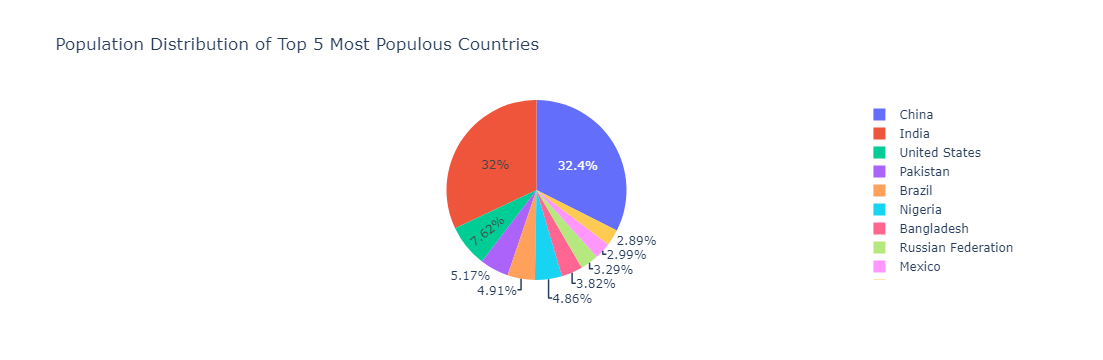

In [267]:
fig_pie = px.pie(top_10_countries, names='Country Name', values='population', title='Population Distribution of Top 5 Most Populous Countries')
fig_pie.show()